# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Loading the Dataset**

In [3]:
data=pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
print("Rows:",data.shape[0])
print("Columns:",data.shape[1])

Rows: 2126
Columns: 22


# **Data Preprocessing**

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [8]:
data.notnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2122,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2123,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2124,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
data.keys()

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [11]:
# Analysing the target column
data['fetal_health'].unique()

array([2., 1., 3.])

# **Data Visualization(EDA)**

**Count plot**

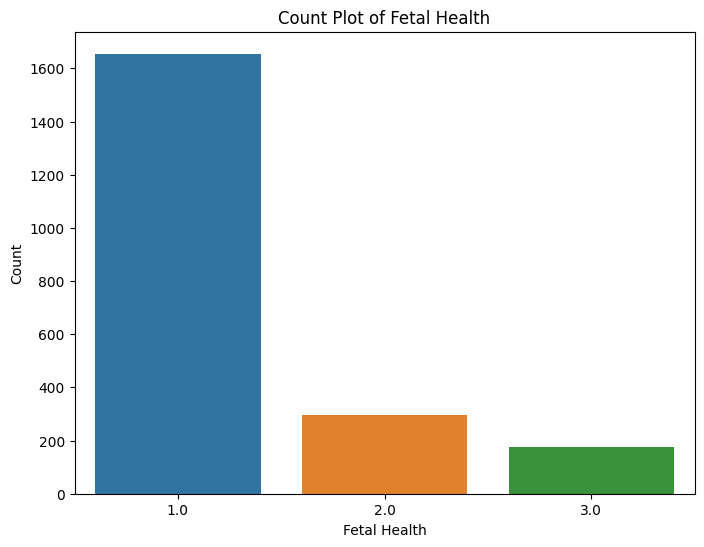

In [12]:

# Plot count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=data)
plt.title('Count Plot of Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()


**Scatter plot**

<Figure size 1500x800 with 0 Axes>

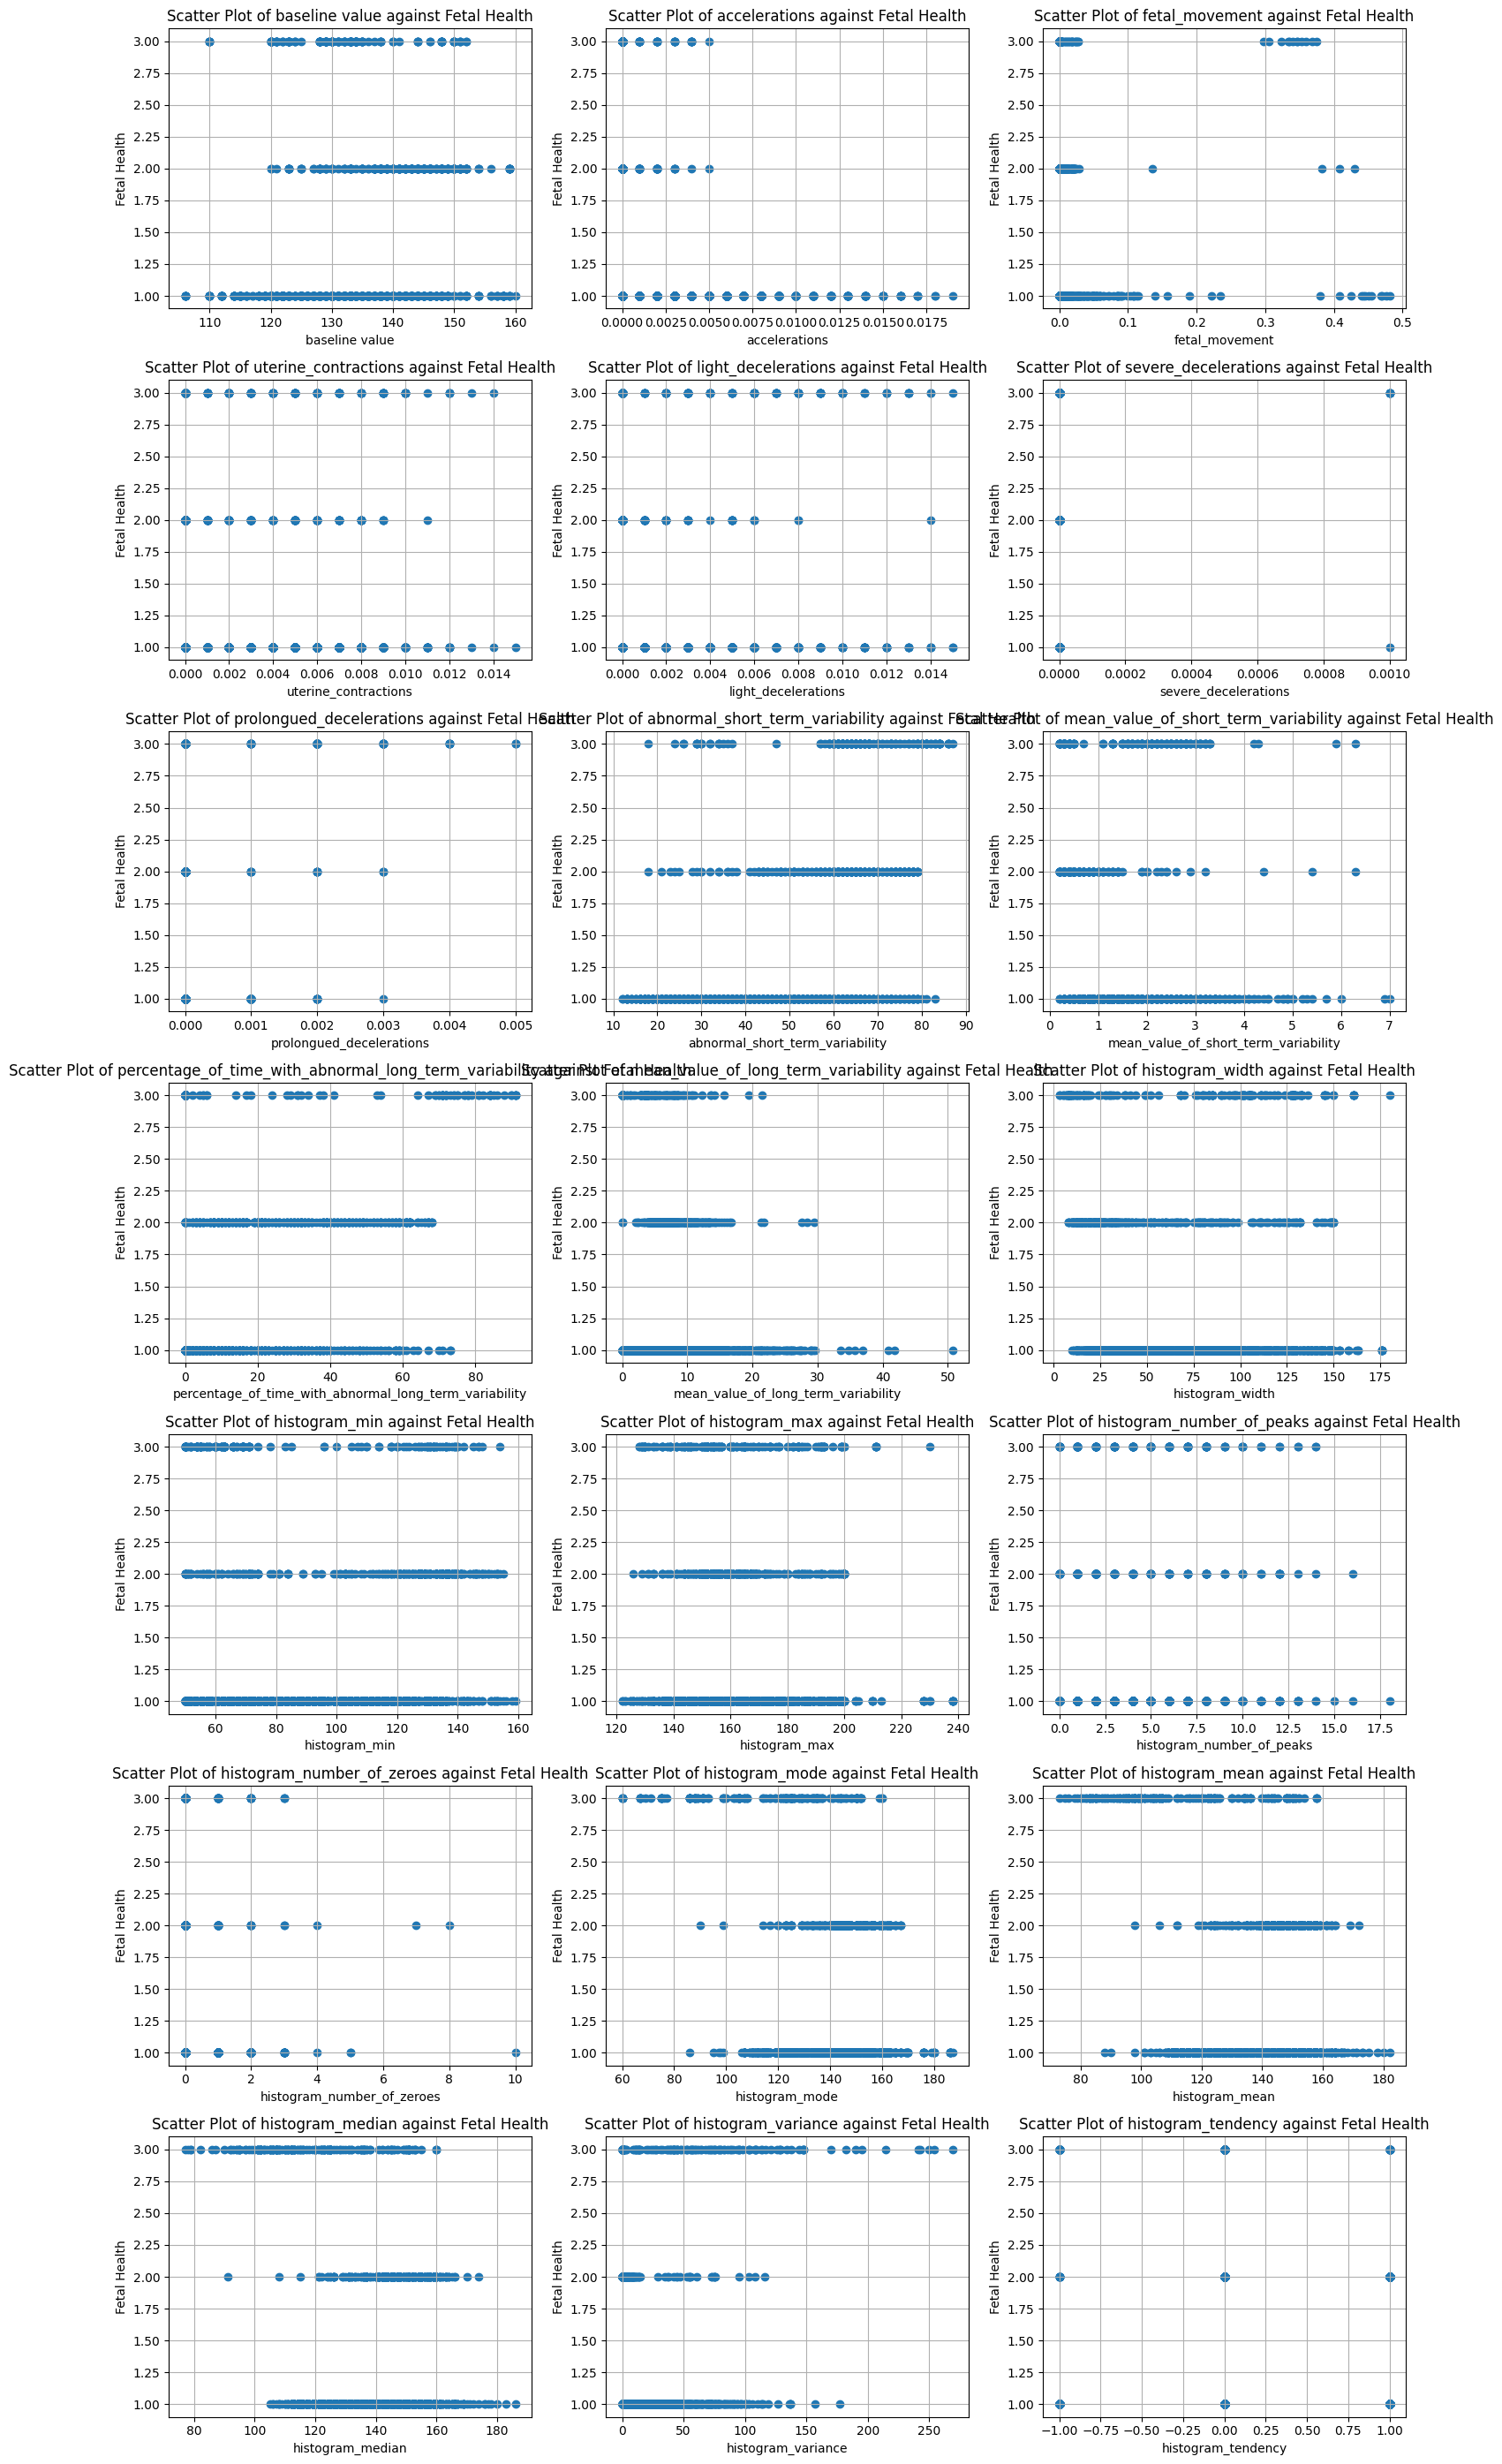

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the figure size
plt.figure(figsize=(15, 8))  # Adjust the width and height according to your preference

# List of features
features = ['baseline value', 'accelerations', 'fetal_movement',
            'uterine_contractions', 'light_decelerations', 'severe_decelerations',
            'prolongued_decelerations', 'abnormal_short_term_variability',
            'mean_value_of_short_term_variability',
            'percentage_of_time_with_abnormal_long_term_variability',
            'mean_value_of_long_term_variability', 'histogram_width',
            'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
            'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
            'histogram_median', 'histogram_variance', 'histogram_tendency']

# Plotting each feature against the target variable 'fetal_health'
num_features = len(features)
num_rows = num_features // 3 + (1 if num_features % 3 != 0 else 0)  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4*num_rows))

for i, feature in enumerate(features):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Select the appropriate axis
    ax.scatter(data[feature], data['fetal_health'])
    ax.set_ylabel('Fetal Health')
    ax.set_xlabel(feature)
    ax.set_title(f'Scatter Plot of {feature} against Fetal Health')
    ax.grid(True)

# Remove empty subplots
if num_features % 3 != 0:
    for j in range(num_features % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()
plt.show()

# **Checking for Data imbalance**

Class distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


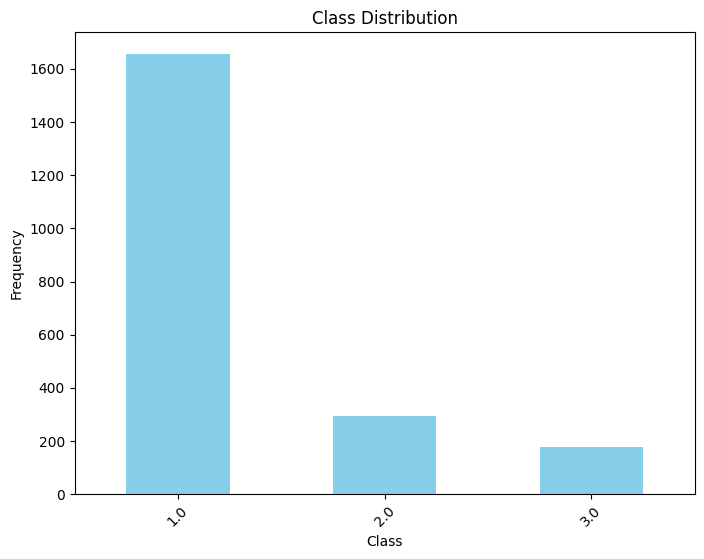

Imbalance ratio: 0.10634441087613293


In [14]:
# Assuming 'df' is your DataFrame and 'target_column' is the column containing class labels
class_distribution = data['fetal_health'].value_counts()
print("Class distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Calculate imbalance ratio
imbalance_ratio = class_distribution.min() / class_distribution.max()
print("Imbalance ratio:", imbalance_ratio)


# **SMOTE Analysis(OverSampling)**

In [15]:
# Assuming 'df' is your DataFrame and 'fetal_health' is the target variable
X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target variable

# Initialize SMOTE
smote = SMOTE()

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data to DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['fetal_health'])], axis=1)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(df_resampled['fetal_health'].value_counts())

Class distribution after oversampling:
fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64


In [16]:
df_resampled
x=df_resampled.drop('fetal_health',axis=1)
y=df_resampled['fetal_health']

**Count Plot after Removing Imbalance**

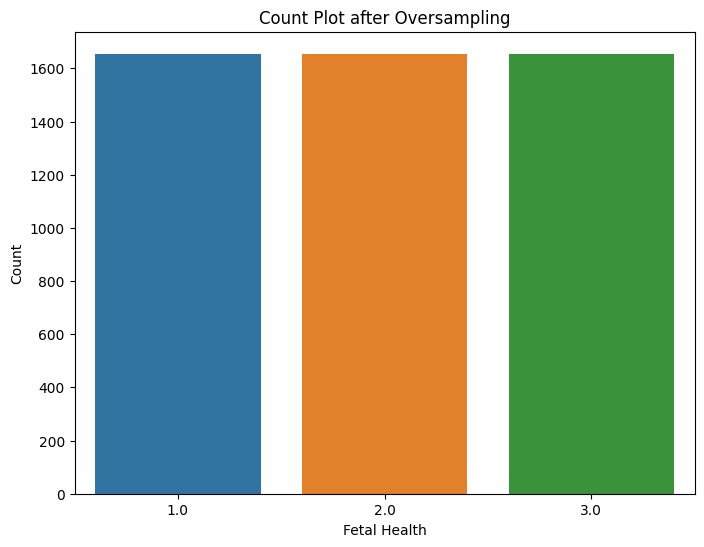

In [17]:
# Plot count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=df_resampled)
plt.title('Count Plot after Oversampling')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()


# **Principle Component Analysis(PCA)**

**Standardization**

In [18]:
features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions','light_decelerations',
            'severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability',
           'percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width',
            'histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode',
           'histogram_median','histogram_variance','histogram_tendency']

# Separating out the features
xr = df_resampled.loc[:, features].values

# Separating out the target
yr = df_resampled.loc[:,['fetal_health']].values

In [19]:
x = StandardScaler().fit_transform(df_resampled)

In [20]:
means = np.mean(x, axis=0)
stds = np.std(x, axis=0)

print('Means:\n', means)

print('Standard Deviations:\n', stds)


Means:
 [-2.06078860e-15  2.28976511e-17  1.14488256e-17 -1.14488256e-16
  2.28976511e-17 -1.71732383e-17 -4.57953022e-17  3.20567115e-16
  1.11626049e-16 -4.57953022e-17  9.15906044e-17 -7.44173661e-17
  3.52051386e-16  4.46504196e-16  5.15197150e-17 -2.14665479e-17
 -4.57953022e-17 -2.28976511e-17  9.15906044e-17 -9.15906044e-17
 -6.86929533e-17  0.00000000e+00]
Standard Deviations:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Fit and Transform**

In [21]:
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','pc3','pc4','pc5','pc6','pca7','pca8','pca9','pca10'])

In [22]:
principalDf

,principal component 1,principal component 2,pc3,pc4,pc5,pc6,pca7,pca8,pca9,pca10
0,-0.480013,-1.981312,0.994700,1.474536,0.081728,-0.968847,1.857366,0.183635,-0.091136,-0.054815
1,1.668932,3.792657,0.513560,-0.475349,-0.277334,0.549245,-0.079183,-0.747409,0.457523,0.520245
2,1.655103,3.679280,0.490096,-0.095657,-0.488049,0.316951,-1.157630,-0.529274,-0.050706,0.747069
3,1.483580,4.278427,0.804708,1.895717,0.028995,-0.580961,-0.448617,-0.029346,-1.817948,0.897560
4,1.157807,4.442633,1.303911,1.039349,0.457445,-0.441943,0.323844,-0.038803,-1.265526,0.198106
...,...,...,...,...,...,...,...,...,...,...
4960,3.101381,-1.043556,-0.692284,-0.227483,0.067603,-0.875726,-0.322658,0.211275,-0.758619,-0.660143
4961,1.067518,-2.735808,-1.649187,2.325831,6.193101,1.284095,-0.195127,2.867240,1.316798,-1.683449
4962,4.316279,-1.641892,-0.295311,0.911965,-1.298819,-1.228792,-0.197438,-0.256284,1.706520,-1.056337
4963,4.372508,-0.940994,-1.327330,-1.406704,0.302998,-1.054984,-0.009586,0.502562,-0.979807,-0.701722


In [23]:
finalDf = pd.concat([principalDf, data[['fetal_health']]], axis = 1)

**Plot after Standardization**

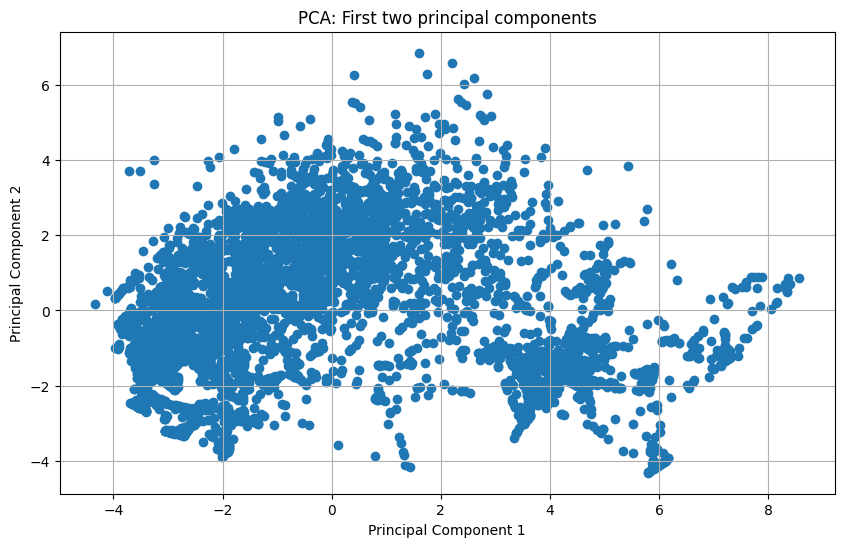

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# **Different Models**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#lr
X_train, X_test, y_train, y_test = train_test_split(principalDf, yr, test_size=0.3,random_state=42)
#rf,dt,knn,svc
X1_train, X1_test, y1_train, y1_test = train_test_split(xr, yr, test_size=0.3,random_state=42)

In [27]:
principalDf.shape

(4965, 10)

In [28]:
xr.shape

(4965, 20)

In [29]:
yr.shape

(4965, 1)

Random forest Accuracy: 0.9758389261744966
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       520
         2.0       0.96      0.98      0.97       485
         3.0       0.99      0.99      0.99       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



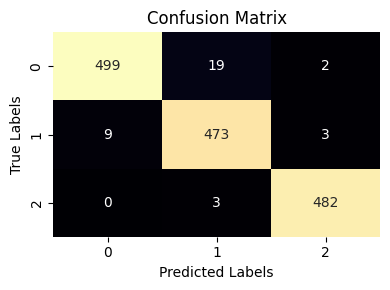

In [32]:
clf1 = RandomForestClassifier()
clf1.fit(X1_train, y1_train.ravel())

# Making predictions
y1_pred = clf1.predict(X1_test)

# Evaluating the model 
accuracy1 = clf1.score(X1_test, y1_test)
print("Random forest Accuracy:", accuracy1)
print(classification_report(y1_test, y1_pred))

conf_matrix = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='g', cbar=False)

# Add labels, title, and adjust layout
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

# Show the plot
plt.show()

Decision Tree Accuracy: 0.9563758389261745
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       520
         2.0       0.93      0.94      0.94       485
         3.0       0.98      0.98      0.98       485

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490



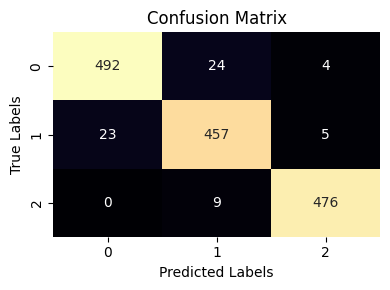

In [33]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(X1_train,y1_train.ravel())

# Predict the response for test dataset
y2_pred = clf2.predict(X1_test)

# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy:", accuracy_score(y1_test, y2_pred))
print(classification_report(y1_test, y2_pred))

conf_matrix = confusion_matrix(y1_test, y2_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='g', cbar=False)

# Add labels, title, and adjust layout
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

# Show the plot
plt.show()

KNeighborsClassifier Accuracy: 0.9288590604026845
              precision    recall  f1-score   support

         1.0       0.98      0.88      0.93       520
         2.0       0.86      0.95      0.90       485
         3.0       0.95      0.96      0.96       485

    accuracy                           0.93      1490
   macro avg       0.93      0.93      0.93      1490
weighted avg       0.93      0.93      0.93      1490



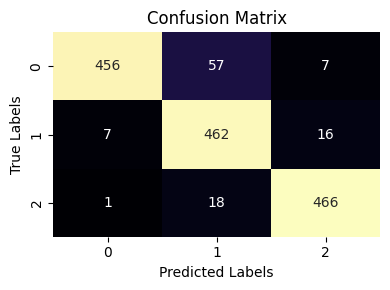

In [34]:
# Create KNN classifier object
clf3 = KNeighborsClassifier(n_neighbors=46) # You can adjust the number of neighbors (k) here

# Train KNN classifier
clf3.fit(X_train, y_train.ravel())

# Predict the response for test dataset
y3_pred = clf3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("KNeighborsClassifier Accuracy:", accuracy_score(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

conf_matrix = confusion_matrix(y_test, y3_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='g', cbar=False)

# Add labels, title, and adjust layout
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

# Show the plot
plt.show()

SVC Accuracy: 0.9838926174496644
              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       520
         2.0       0.95      1.00      0.98       485
         3.0       1.00      1.00      1.00       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



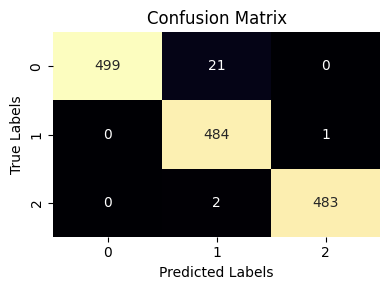

In [35]:
# Create SVC classifier object
clf4 = SVC() 

# Train KNN classifier
clf4.fit(X_train, y_train.ravel())

# Predict the response for test dataset
y4_pred = clf4.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("SVC Accuracy:", accuracy_score(y_test, y4_pred))
print(classification_report(y_test, y4_pred))

conf_matrix = confusion_matrix(y_test, y4_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='g', cbar=False)

# Add labels, title, and adjust layout
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

# Show the plot
plt.show()

Logistic Regression Accuracy: 0.9724832214765101
              precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       520
         2.0       0.94      0.98      0.96       485
         3.0       0.99      0.98      0.98       485

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



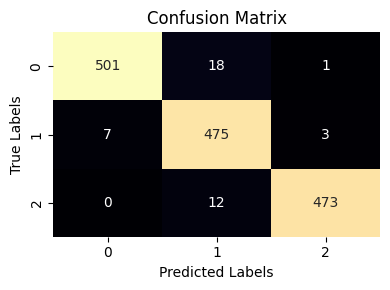

In [36]:
from sklearn.linear_model import LogisticRegression
clf5 = LogisticRegression() 

# Train KNN classifier
clf5.fit(X_train, y_train.ravel())

# Predict the response for test dataset
y5_pred = clf5.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Logistic Regression Accuracy:", accuracy_score(y_test, y5_pred))
print(classification_report(y_test, y5_pred))

conf_matrix = confusion_matrix(y_test, y5_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='g', cbar=False)

# Add labels, title, and adjust layout
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

# Show the plot
plt.show()

# **Result**

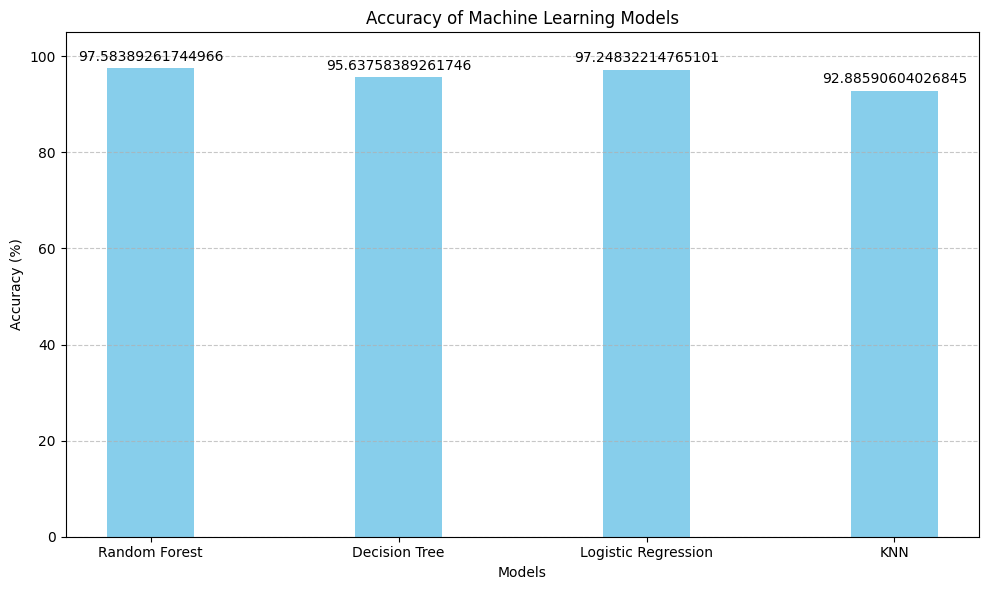

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN']  # Names of the models
accuracies =[accuracy_score(y1_test, y1_pred)*100, accuracy_score(y1_test, y2_pred)*100,
             accuracy_score(y_test, y5_pred)*100,accuracy_score(y_test, y3_pred)*100]  # Accuracies of the models

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.35

# Index for the x-axis (position of each group)
index = np.arange(len(models))

# Plot the bars for accuracies
bars = ax.bar(index, accuracies, bar_width, label='Accuracy', color='skyblue')

# Add labels, title, and grid
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy of Machine Learning Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.set_ylim(0, 105)
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()